# Load/save and structure data

You will learn to **load and save data** both to and from offline sources (e.g. CSV or Excel). You will learn about **pandas series and dataframes**, and how to clean, rename, structure and index your data.

**Links:**

1. Official [tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)
2. DataCamp's [pandas' cheat sheet](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet)

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Pandas dataframes

In Pandas, the fundamental object of interest is a **pandas dataframe**. For example:

In [2]:
X = pd.DataFrame(data = [[1,11.7,'Vitus'],[2,13.9,'Maximilian'],[3,14.6,'Bo-Bob']], 
                 columns=['id','inc','name'])
X

,id,inc,name
0,1,11.7,Vitus
1,2,13.9,Maximilian
2,3,14.6,Bo-Bob


**A dataframe is essentially a matrix.**

* rows = observations 
* columns = variables 

**General information:**

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
id      3 non-null int64
inc     3 non-null float64
name    3 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


**What does `object` mean?** In practice it is a `str`.

**Note:** You can also show a dataframe in the  middle of some code.

In [4]:
print('before')
display(X)
print('after')

before


,id,inc,name
0,1,11.7,Vitus
1,2,13.9,Maximilian
2,3,14.6,Bo-Bob


after


## Indexing ("subsetting") 

**Choosing a subset of the rows and/or columns of a dataframe is known as "indexing"**. 

All pandas dataframes are born with the method `.loc[]`.

* `df.loc[:, ['year']]` selects all rows (indicated by `:`) but only the column (variable) `year`. 
* `df.loc[df['year'] == 2002, :]` selects the rows where the variable `year` is equal to 2002 and all columns (indicated by `:`)
* `df.loc[df['year'] == 2002, ['name']]` selects the variable `name` and shows the rows where `year` is equal to 2002. 

In general, the **syntax** is `df.loc[CONDITION, [VARLIST]]`, where `CONDITION` is a vector of logical statements with the same length as the number of rows in the dataframe, and `VARLIST` is a list over variables. 

In [5]:
X.loc[X['id'] > 1, ['name']]

,name
1,Maximilian
2,Bo-Bob


All variables:

In [6]:
X.loc[X['id'] > 1]

,id,inc,name
1,2,13.9,Maximilian
2,3,14.6,Bo-Bob


**Alternatives:**

Use a boolean series

In [7]:
I = X['id'] > 1
X.loc[I, ['name']]

,name
1,Maximilian
2,Bo-Bob


Use `.VARIABLE` notation

In [8]:
X.loc[X.id > 1, ['id','name']]

,id,name
1,2,Maximilian
2,3,Bo-Bob


## Adding a variable

Variables are added with `df['newvar'] = SOMETHING`.

In [9]:
X['year'] = [2003, 2005, 2010]
X

,id,inc,name,year
0,1,11.7,Vitus,2003
1,2,13.9,Maximilian,2005
2,3,14.6,Bo-Bob,2010


**Note:** You canNOT write `df.newvar = SOMETHING`. Some of you will forget. I promise. 

The *something* can be an **expression based on other variables**.

In [10]:
X['inc_adj'] = X['inc'] / 1.02**(X['year']-2005)
X

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


## Assignments to a subset of rows

**LHS:** Selected using logical statement.<br>
**RHS:** Must either be:

1. a **single value** (all rows are set to this) 
2. a **list of values** with same length as the number of selected rows

**Multiple rows, one value:**

In [11]:
display(X)
Y = X.copy()

Y.loc[Y['id'] > 1, ['name']] = 'test'
Y

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,test,2005,13.90000
2,3,14.6,test,2010,13.22367


**Multiple rows, multiple values:**

In [12]:
display(X)
Y = X.copy()

Y.loc[(Y['name'] == 'Vitus') | (Y['year'] == 2005), ['name']] = ['Bib', 'Peter']
Y

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


,id,inc,name,year,inc_adj
0,1,11.7,Bib,2003,12.17268
1,2,13.9,Peter,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


## Copies vs. views

**Looking** at the data it is natural to do:

In [13]:
Z = Y[['id','name']]
Z

,id,name
0,1,Bib
1,2,Peter
2,3,Bo-Bob


In [14]:
I = Y['id'] > 1
Z[I]

,id,name
1,2,Peter
2,3,Bo-Bob


Importantly, this **does not work with assignment**.

**Case 1:** Sometimes it does not work outright.

In [15]:
display(X)
Y = X.copy()
Z = Y[['id','name']] # returns a copy
I = Y['id'] > 1
Z.loc[I, ['name']] = 'test'
Y

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


C:\Users\gmf123\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


**Case 2:** Sometimes it works, but it is not intended use.

In [16]:
display(X)
Y = X.copy()

I = Y['id'] > 1
Z = Y['name'] # returns a view (same with Y.name)
Z[I] = 'test'
Y

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


C:\Users\gmf123\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,test,2005,13.90000
2,3,14.6,test,2010,13.22367


**Solution:** Do the assignment in one step.

In [17]:
I = Y['id'] > 1
Y.loc[I, ['name']] = 'test'
Y

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,test,2005,13.90000
2,3,14.6,test,2010,13.22367


## The index

The **first column** in the dataset is referred to as the `index` of the dataframe.<br>
**Baseline:** If you haven't done anything, it is just `[0, 1, 2, ....]`.

In [18]:
X.loc[0]

id               1
inc           11.7
name         Vitus
year          2003
inc_adj    12.1727
Name: 0, dtype: object

**Custom:** You can, for example, use the name as the index instead.

In [19]:
Y = X.set_index('name') # returns a copy
Y # notice name is now below the other variables

,id,inc,year,inc_adj
name,,,,
Vitus,1,11.7,2003,12.17268
Maximilian,2,13.9,2005,13.90000
Bo-Bob,3,14.6,2010,13.22367


In [20]:
Y.loc['Vitus']

id            1.00000
inc          11.70000
year       2003.00000
inc_adj      12.17268
Name: Vitus, dtype: float64

## Series and numpy arrays

When you select an individual variable, it has the data type `Series`. Some functions work on a pandas series (e.g. most numpy functions), but it is sometimes nice to extract the underlying numpy objects: 

* `df`: **pandas dataframe** 
* `df['variable']`: **pandas series**
* `df['variabe'].values` (or `.to_numpy()`): **numpy array**

In [21]:
type(X)

pandas.core.frame.DataFrame

In [22]:
type(X[['year','inc_adj']]) # returns a copy

pandas.core.frame.DataFrame

In [23]:
type(X['year']) # returns a view

pandas.core.series.Series

In [24]:
type(X['year'].values) # returns a view

numpy.ndarray

## Calling functions

**Row-by-row:**

In [25]:
Y = X.copy()
def adj_row_by_row(row):
    return row['inc'] / 1.02**(row['year']-2005)

Y['inc_adj_alt1'] = Y.apply(adj_row_by_row,axis=1)
Y

,id,inc,name,year,inc_adj,inc_adj_alt1
0,1,11.7,Vitus,2003,12.17268,12.17268
1,2,13.9,Maximilian,2005,13.90000,13.90000
2,3,14.6,Bo-Bob,2010,13.22367,13.22367


**Function for numpy arrays:**

In [26]:
def all_at_once(inc,year):
    return inc / 1.02**(year-2005)

Y['inc_adj_alt2'] = all_at_once(Y['inc'].values,Y['year'].values)
Y

,id,inc,name,year,inc_adj,inc_adj_alt1,inc_adj_alt2
0,1,11.7,Vitus,2003,12.17268,12.17268,12.17268
1,2,13.9,Maximilian,2005,13.90000,13.90000,13.90000
2,3,14.6,Bo-Bob,2010,13.22367,13.22367,13.22367


**Funcion for numpy arrays with inplace changes** (i.e. a function without any return statement):

In [27]:
def all_at_once_inplace(inc,year):
    inc[:] = all_at_once(inc,year)

Y['inc_adj_alt3'] = Y['inc']
all_at_once_inplace(Y['inc_adj_alt3'].values,Y['year'].values)
Y

,id,inc,name,year,inc_adj,inc_adj_alt1,inc_adj_alt2,inc_adj_alt3
0,1,11.7,Vitus,2003,12.17268,12.17268,12.17268,12.17268
1,2,13.9,Maximilian,2005,13.90000,13.90000,13.90000,13.90000
2,3,14.6,Bo-Bob,2010,13.22367,13.22367,13.22367,13.22367


# Reading and writing data

**Check:** We make sure that we have the **data/** subfolder, and that it has the datasets we need.

In [28]:
import os 

assert os.path.isdir('data/')
assert os.path.isfile('data/RAS200.xlsx')
assert os.path.isfile('data/INDKP107.xlsx')

os.listdir('data/')

['area.csv',
 'areal.xlsx',
 'INDKP107.xlsx',
 'INDKP107_long.csv',
 'RAS200.xlsx',
 'RAS200_long.csv']

## Reading in data

Pandas offers a lot of facilities for **reading and writing to different formats**. The functions have logical names: 

* CSV: `pd.read_csv()`
* SAS: `pd.read_sas()`
* Excel: `pd.read_excel()`
* Stata: `pd.read_stata()`
* Parquet: `pd.read_parquet()`

**Inspecting:** 

* `df.head(10)` is ued to inspect the first 10 rows
* `df.sample(10)` is ued to look at 10 random rows

**Example:** Raw download from DST

In [29]:
filename = 'data/RAS200.xlsx' # open the file and have a look at it
pd.read_excel(filename).head(5)

,"Activity and employment rates (end November) by frequency, sex, age, ancestry, region and time",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Units: per cent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
2,Employment rate,Total,"Age, total",Total,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
3,NaN,NaN,NaN,NaN,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
4,NaN,NaN,NaN,NaN,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0


### Getting the right columns and rows

**Skipping rows:** Clearly, we should skip the first three rows and the first four columns

In [30]:
empl = pd.read_excel(filename, skiprows=2)
empl.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Employment rate,Total,"Age, total",Total,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
1,NaN,NaN,NaN,NaN,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
2,NaN,NaN,NaN,NaN,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
3,NaN,NaN,NaN,NaN,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,NaN,NaN,NaN,NaN,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6


**Dropping columns:** The first couple of columns are not needed and contain only missing values (denoted by `NaN` (not-a-number)), so we will drop those. 

In [31]:
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
empl.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
empl.head(5)

,Unnamed: 4,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6


> **Alternative:** Use `del empl['Unnamed: 0']`.

### Renaming variables

Let's rename the first variable, which is now called `Unnamed: 4`. This is done using `df.rename(columns=dict)`, where dict must be a Python *dictionary*.

In [32]:
empl.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)
empl.head(5)

,municipality,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6


**More renaming:** We also see that the employment rate in 2008 has been named `2008`. Having a variable that is named a number can cause problems with some functions (and many other programming languages do not even allow it), so let us change their names. To do so, we need to create a dictionary that maps each of the years {2008, ..., 2016} to {e2008, ..., e2016}. 

In [33]:
myDict = {}
for i in range(2008, 2017+1): # range goes from 2008 to but not including 2018
    myDict[str(i)] = f'e{i}' 
myDict

{'2008': 'e2008',
 '2009': 'e2009',
 '2010': 'e2010',
 '2011': 'e2011',
 '2012': 'e2012',
 '2013': 'e2013',
 '2014': 'e2014',
 '2015': 'e2015',
 '2016': 'e2016',
 '2017': 'e2017'}

In [34]:
empl.rename(columns = myDict, inplace=True)
empl.head(10)

,municipality,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6
5,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4
6,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6
7,Province Københavns omegn,77.1,74.2,73.2,73.0,72.4,72.4,72.6,73.3,73.8,74.4
8,Albertslund,73.1,69.2,67.5,67.4,66.5,67.0,67.4,68.7,68.8,70.2
9,Ballerup,75.9,72.9,71.9,72.0,71.4,71.0,71.8,72.8,73.6,74.5


**Extract:** Now we can find the employment rate in the municipality where Jeppe grew up: 

In [35]:
empl.loc[empl.municipality == 'Roskilde']

,municipality,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017
41,Roskilde,79.1,76.3,75.2,74.9,74.1,74.0,74.0,74.5,75.6,76.8


### Dropping observations that are not actually municipalities 

The dataset contains observations like "Region Hovedstaden", which is not a municipality, so we want to drop such rows. To do this, we can use the `df['var'].str` functionalities, in particular `df['var'].str.contains('PATTERN')`. 

In [36]:
I = empl.municipality.str.contains('Region')
I |= empl.municipality.str.contains('Province')
I |= empl.municipality.str.contains('All Denmark')
empl.loc[I, :]

,municipality,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
7,Province Københavns omegn,77.1,74.2,73.2,73.0,72.4,72.4,72.6,73.3,73.8,74.4
21,Province Nordsjælland,79.4,76.9,76.3,76.1,75.8,75.8,76.1,76.5,77.1,77.6
33,Province Bornholm,68.0,66.4,65.9,67.1,66.0,66.1,67.0,67.3,69.3,70.2
36,Region Sjælland,75.7,72.7,71.9,71.6,70.9,71.0,71.3,71.9,72.6,73.3
37,Province Østsjælland,79.5,76.7,75.8,75.7,75.0,75.0,75.3,76.0,76.7,77.7
43,Province Vest- og Sydsjælland,74.2,71.1,70.3,69.9,69.2,69.3,69.7,70.1,70.8,71.5
56,Region Syddanmark,75.7,72.0,71.2,70.7,70.0,70.1,70.5,70.8,71.6,72.5


**Delete these rows:**

In [37]:
empl = empl.loc[I == False] # keep everything else
empl.head(10)

,municipality,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6
5,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4
6,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6
8,Albertslund,73.1,69.2,67.5,67.4,66.5,67.0,67.4,68.7,68.8,70.2
9,Ballerup,75.9,72.9,71.9,72.0,71.4,71.0,71.8,72.8,73.6,74.5
10,Brøndby,72.3,69.6,68.3,68.2,67.4,67.5,67.3,68.0,69.1,69.4
11,Gentofte,79.2,76.6,76.4,76.1,75.5,75.2,74.7,75.1,75.2,76.1
12,Gladsaxe,77.9,75.0,74.1,73.6,73.2,73.1,73.4,74.1,74.3,75.3
13,Glostrup,79.2,76.1,74.5,75.0,74.7,74.8,74.4,75.0,75.5,76.0


### Summary statistics 

To get an overview of employments across municipalities we can use the function `df.describe()`.

In [38]:
empl.describe()

,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,76.629293,73.419192,72.794949,72.591919,72.020202,72.091919,72.431313,72.876768,73.669697,74.463636
std,3.727538,3.626537,3.617062,3.691211,3.804240,3.704484,3.660062,3.647275,3.549690,3.554114
min,62.900000,63.400000,62.400000,61.500000,60.700000,61.200000,61.600000,62.200000,62.600000,63.100000
25%,74.650000,71.350000,70.550000,70.000000,69.450000,69.700000,70.200000,70.750000,71.500000,72.500000
50%,76.800000,73.300000,72.900000,72.600000,72.100000,72.200000,72.600000,73.100000,74.000000,74.600000
75%,79.150000,75.900000,75.200000,75.050000,74.500000,74.500000,74.700000,75.200000,75.700000,76.700000
max,84.000000,81.500000,81.400000,80.500000,80.700000,80.500000,80.900000,81.200000,81.800000,82.200000


**Single descriptive statistic:** We can also just get the mean for each year:

In [39]:
empl.mean()

e2008    76.629293
e2009    73.419192
e2010    72.794949
e2011    72.591919
e2012    72.020202
e2013    72.091919
e2014    72.431313
e2015    72.876768
e2016    73.669697
e2017    74.463636
dtype: float64

## Long vs. wide datasets: `pd.wide_to_long()`

Often in economic applications, it can be useful to switch between *wide* vs. *long* formats (long is sometimes referred to as *tall*, e.g. in Stata). This is done by the commands `pd.wide_to_long()` (and `pd.long_to_wide()`).  Many types of analysis are easier to do in one format than in another so it is extremely useful to be able to switch comfortably between formats. 

**Common:** Think of a dataset as having an `ID` and a `PERIOD` variable. In our dataset `empl`, the `ID` variable is `municipality`, and the `PERIOD` variable is `year`. 

**Wide dataset:** The default from Statistics Denmark: each row corresponds to an `ID` and there is a variable for each `PERIOD`. 

**Long dataset:** There is one row for each combination of (`ID`, `PERIOD`). 

In general, Pandas will assume that the variables in the *wide* format have a particular structure: namely they are of the form `XPERIOD`, where `X` is called the "stub". In our case, the variable names are e.g. `e2011`, so the stub is `e` and the period (for that variable) is `2011`. 

In [40]:
empl_long = pd.wide_to_long(empl, stubnames='e', i='municipality', j='year')
empl_long.head(10)

,,e
municipality,year,
Copenhagen,2008,72.5
Frederiksberg,2008,75.6
Dragør,2008,80.5
Tårnby,2008,79.0
Albertslund,2008,73.1
Ballerup,2008,75.9
Brøndby,2008,72.3
Gentofte,2008,79.2
Gladsaxe,2008,77.9


**Note:** The variables `municipality` and `year`  are now in the index!! We see that because they are "below" `e` in the `head` overview. 

We can **select a specific municipality** using ``.xs``:

In [41]:
empl_long.xs('Roskilde',level='municipality')

,e
year,
2008,79.1
2009,76.3
2010,75.2
2011,74.9
2012,74.1
2013,74.0
2014,74.0
2015,74.5
2016,75.6


Or ``.loc[]`` in a special way:

In [42]:
empl_long.loc[empl_long.index.get_level_values('municipality') == 'Roskilde', :]

e
municipality year      
Roskilde     2008  79.1
             2009  76.3
             2010  75.2
             2011  74.9
             2012  74.1
             2013  74.0
             2014  74.0
             2015  74.5
             2016  75.6
             2017  76.8

**Alternative:** Reset the index, and use `.loc` as normal.

In [43]:
empl_long = empl_long.reset_index()
empl_long.loc[empl_long.municipality == 'Roskilde', :]

,municipality,year,e
33,Roskilde,2008,79.1
132,Roskilde,2009,76.3
231,Roskilde,2010,75.2
330,Roskilde,2011,74.9
429,Roskilde,2012,74.1
528,Roskilde,2013,74.0
627,Roskilde,2014,74.0
726,Roskilde,2015,74.5
825,Roskilde,2016,75.6
924,Roskilde,2017,76.8


**Plot:** Here's a cute little plot using the builtin pandas plot function. 

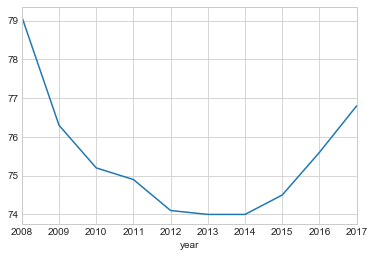

In [44]:
empl_long.loc[empl_long['municipality'] == 'Roskilde', :].plot(x='year',y='e',legend=False);

We can even do it **interactively**:

In [45]:
import ipywidgets as widgets
def plot_e(df, municipality): 
    I = df['municipality'] == municipality
    ax=df.loc[I,:].plot(x='year', y='e', style='-o', legend=False)

In [46]:
widgets.interact(plot_e, 
    df = widgets.fixed(empl_long),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=empl_long.municipality.unique(), 
                                    value='Roskilde')
); 

interactive(children=(Dropdown(description='Municipality', index=33, options=('Copenhagen', 'Frederiksberg', '…

## Income

Next, we will read in the avg. disposable income for highly educated in each municipality. Here we do the cleaning, renaming and structuring in a few condensed lines.

In [47]:
# a. load
inc = pd.read_excel('data/INDKP107.xlsx', skiprows=2)

# b. clean and rename
inc.drop([f'Unnamed: {i}' for i in range(4)], axis=1, inplace=True) # using list comprehension
inc.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True) 
inc.rename(columns = {str(i): f'inc{i}' for i in range(2004,2018)}, inplace=True) # using dictionary comprehension

# c. drop rows with missing
inc.dropna(inplace=True)

# d. remove non-municipalities
for val in ['Region','Province', 'All Denmark']: 
    I = inc.municipality.str.contains(val)
    inc.drop(inc[I].index, inplace=True) # .index -> get the indexes of the series
    
inc.head(5)

,municipality,inc2004,inc2005,inc2006,inc2007,inc2008,inc2009,inc2010,inc2011,inc2012,inc2013,inc2014,inc2015,inc2016,inc2017
3,Copenhagen,233204.0,244462.0,255315.0,254533.0,259216.0,266636.0,297422.0,303717.0,308601.0,316362.0,325070.0,334083.0,327179.0,333579.0
4,Frederiksberg,276111.0,291299.0,305539.0,301547.0,296988.0,304406.0,349249.0,356537.0,363466.0,376072.0,379308.0,397210.0,389151.0,409097.0
5,Dragør,326324.0,330289.0,339630.0,367640.0,371290.0,375508.0,425605.0,471854.0,457410.0,469260.0,482857.0,494313.0,475567.0,490152.0
6,Tårnby,264299.0,273414.0,291735.0,279844.0,288973.0,296610.0,336077.0,368789.0,347705.0,357150.0,359455.0,372565.0,360230.0,373304.0
8,Albertslund,253319.0,260060.0,270290.0,267863.0,269855.0,283067.0,313767.0,308977.0,320298.0,328004.0,334630.0,344447.0,334094.0,332943.0


**Convert** wide -> long:

In [48]:
inc_long = pd.wide_to_long(df=inc, stubnames='inc', i='municipality', j='year')
inc_long.reset_index(inplace=True)
inc_long.head(5)

,municipality,year,inc
0,Copenhagen,2004,233204.0
1,Frederiksberg,2004,276111.0
2,Dragør,2004,326324.0
3,Tårnby,2004,264299.0
4,Albertslund,2004,253319.0


## Municipal area

Finally, let's read in a dataset on municipality areas in km$^2$. 

In [49]:
# a. load
area = pd.read_excel('data/areal.xlsx', skiprows=2)

# b. clean and rename
area.rename(columns = {'Unnamed: 0':'municipality','2019':'km2'}, inplace=True)

# c. drop rows with missing
area.dropna(inplace=True)

# d. remove non-municipalities
for val in ['Region','Province', 'All Denmark']: 
    I = area.municipality.str.contains(val)
    area.drop(area[I].index, inplace=True)
    
area.head(5)

,municipality,km2
2,Copenhagen,86.7
3,Frederiksberg,8.7
4,Dragør,18.3
5,Tårnby,66.1
6,Albertslund,23.4


## Writing data

As with reading in data, we have the corresponding functions for **writing data**:

* CSV: `pd.to_csv()`
* SAS: `pd.to_sas()`
* Excel: `pd.to_excel()`
* Stata: `pd.to_stata()`
* Parquet: `pd.to_parquet()`

Let's **save our dataset to CSV form**. We will set `index=False` to avoid saving the index (which does not mean anything here but can in other contexts be an annoying thing). 

In [50]:
empl_long.to_csv('data/RAS200_long.csv', index=False)
inc_long.to_csv('data/INDKP107_long.csv', index=False)
area.to_csv('data/area.csv', index=False)

# Summary

**This lecture**: We have discussed

1. The generel pandas framework (indexing, assigment, copies vs. views, functions)
2. Loading and saving data
3. Basic data cleaning (renaming, droping etc.)
4. Wide $\leftrightarrow$ long transformations

**Your work:** Before solving Problem Set 3 read through this notebook and play around with the code.

**Next lecture:** Basic data analysis.